In [ ]:
import keras
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Dense

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#### loading word2vec embeddings trained on GoogleNews data by google #######
from gensim.models import Word2Vec
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/GoogleNews-vectors-negative300.bin (1).gz', binary = True)

In [ ]:
#### extracting the vocabulary 
vocabulary = model.vocab
print(len(vocabulary))

3000000


In [ ]:
##### basic preprocessing of text data #####

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):

    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = doc.replace('"',"")

    # tokenize document
    tokens = wpt.tokenize(doc)

    # filter stopwords out of document
    filtered_tokens = [token for token in tokens]

    # re-create document from filtered tokens
    return filtered_tokens



In [ ]:
EMB_SIZE = 300
test_size = .20
ds = "TREC"

In [ ]:
f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".x.train.txt","rb")
sst_1_train_X = list()
print()
for line in f1:
  sst_1_train_X.append(line.decode('latin-1'))
f1.close()
corpus_train = np.array(sst_1_train_X)

'''f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".x.dev.txt","rb")
sst_1_dev_X = list()
print()
for line in f1:
  temp = line.decode('latin-1')
  if len(temp)>2:
    sst_1_dev_X.append(temp)
f1.close()
corpus_dev = np.array(sst_1_dev_X)
'''

f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".y.train.txt")
labels_train = []
for line in f1:
  labels_train.append(line.split("\n")[0])
print(len(labels_train))
f1.close()

'''f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".y.dev.txt")
labels_dev = []
for line in f1:
  labels_dev.append(line.split("\n")[0])
print(len(labels_dev))
f1.close()
'''


5452


'f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".y.dev.txt")\nlabels_dev = []\nfor line in f1:\n  labels_dev.append(line.split("\n")[0])\nprint(len(labels_dev))\nf1.close()\n'

In [ ]:
print(len(corpus_train))
print(corpus_train[30:50])

In [ ]:
##### trian test split of data
from sklearn.model_selection import train_test_split
corpus_train, corpus_dev, labels_train, labels_dev = train_test_split(corpus_train,labels_train,test_size=test_size)
print(len(corpus_train))
print(len(corpus_dev))

4361
1091


In [ ]:
##### mapping text labels to integers
print(labels_dev[:50])
print(labels_train[:10])
#for SST-1
'''
label_to_int = {'VERY NEG':0, 'NEG':1, 'NEU':2, 'POS':3, 'VERY POS':4}
int_to_label = {0:'VERY NEG', 1:'NEG', 2:'NEU', 3:'POS', 4:'VERY POS'}'''

#for SST-2, MR and CR
'''
label_to_int = {'NEG':0, 'POS':1}
int_to_label = {0:'NEG',  1:'POS'}'''

#for MPQA and Subj
'''
label_to_int = {'OBJ':0, 'SUBJ':1}
int_to_label = {0:'OBJ',  1:'SUBJ'}'''

#for TREC

label_to_int = {'LOC':0, 'NUM':1, 'HUM':2, 'DESC':3, 'ENTY':4, 'ABBR':5}
int_to_label = {0:'LOC', 1:'NUM', 2:'HUM', 3:'DESC', 4:'ENTY', 5:'ABBR'}



train_y = np.array([label_to_int[i] for i in labels_train])
dev_y = np.array([label_to_int[i] for i in labels_dev])

['LOC', 'HUM', 'DESC', 'ABBR', 'ENTY', 'DESC', 'ENTY', 'NUM', 'ENTY', 'NUM', 'LOC', 'NUM', 'NUM', 'LOC', 'HUM', 'HUM', 'LOC', 'DESC', 'HUM', 'ENTY', 'NUM', 'NUM', 'ENTY', 'ENTY', 'HUM', 'DESC', 'LOC', 'HUM', 'HUM', 'ENTY', 'DESC', 'ENTY', 'DESC', 'ENTY', 'LOC', 'DESC', 'LOC', 'ENTY', 'ENTY', 'HUM', 'NUM', 'DESC', 'HUM', 'ENTY', 'NUM', 'NUM', 'DESC', 'DESC', 'NUM', 'LOC']
['NUM', 'NUM', 'LOC', 'DESC', 'ENTY', 'ABBR', 'ENTY', 'ENTY', 'DESC', 'HUM']


In [ ]:
print(len(corpus_train))
print(len(corpus_dev))

4361
1091


In [ ]:
#### applying basic preprocessing on text
pro_corpus_train = [] 
for sentence in corpus_train:
  pro_corpus_train.append(normalize_document(sentence))

pro_corpus_dev = [] 
for sentence in corpus_dev:
  pro_corpus_dev.append(normalize_document(sentence))

pro_corpus_train = np.array(pro_corpus_train)
pro_corpus_dev = np.array(pro_corpus_dev)

In [ ]:
print(type(pro_corpus_train[8]),type(pro_corpus_train[8][1]))
print(pro_corpus_train[:9])

<class 'list'> <class 'str'>
[list(['how', 'many', 'children', 'under', 'are', 'victims', 'of', 'some', 'sort', 'of', 'physical', 'abuse', 'each', 'year'])
 list(['when', 'did', 'the', 'royal', 'wedding', 'of', 'prince', 'andrew', 'and', 'fergie', 'take', 'place'])
 list(['what', 'is', 'the', 'richest', 'state', 'in', 'the', 'us'])
 list(['what', 'makes', 'a', 'clitoris', 'sensitive'])
 list(['what', 'was', 'the', 'distinguishing', 'mark', 'on', 'the', 'little', 'rascals', 'dog'])
 list(['what', 'does', 'shield', 'stand', 'for'])
 list(['what', 'is', 'the', 'best', 'way', 'to', 'remove', 'wallpaper'])
 list(['what', 'did', 'benny', 'carter', 'play'])
 list(['what', 'is', 'the', 'origin', 'of', 'the', 'word', 'magic'])]


In [ ]:
###### extracting embedding for the sentences by averaging word2Vec embeddings of word
sentence_emb_train = []
default_emb= np.random.normal(loc = 0.0, scale=1.0, size=EMB_SIZE)
for sentence in pro_corpus_train:
  if len(sentence)<1:
    sentence_emb_train.append(default_emb)
    continue
  temp = []
  for word in sentence:
    if word in vocabulary:
      temp.append(model[word])
    else:
      temp.append(default_emb)
  sentence_emb_train.append(np.average(temp,axis=0))
sentence_emb_train = np.array(sentence_emb_train)
print(sentence_emb_train.shape)

sentence_emb_dev = []
for sentence in pro_corpus_dev:
  if len(sentence)<1:
    sentence_emb_dev.append(default_emb)
    continue
  temp = []
  for word in sentence:
    if word in vocabulary:
      temp.append(model[word])
    else:
      temp.append(default_emb)
  sentence_emb_dev.append(np.average(temp,axis=0))
sentence_emb_dev = np.array(sentence_emb_dev)

print(sentence_emb_train.shape)
print(sentence_emb_dev.shape)

(4361, 300)
(4361, 300)
(1091, 300)


In [ ]:
np.random.seed(42)
nnmodel = Sequential()
nnmodel.add(Dense(64,input_shape = (EMB_SIZE,),activation = "relu",kernel_initializer = 'normal', kernel_regularizer=l2(0.0001)))
nnmodel.add(Dense(16,activation = "relu",kernel_initializer = 'normal', kernel_regularizer=l2(.0001)))
nnmodel.add(Dense(6,activation = "softmax",kernel_initializer = 'normal'))

opt = keras.optimizers.Adam(learning_rate=0.0002)
nnmodel.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt, metrics= ['accuracy'])
nnmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                19264     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 102       
Total params: 20,406
Trainable params: 20,406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(sentence_emb_train.shape,train_y.shape,sentence_emb_dev.shape,dev_y.shape)
history = nnmodel.fit(sentence_emb_train, train_y, epochs=60, validation_data = (sentence_emb_dev,dev_y),batch_size = 32)

(4361, 300) (4361,) (1091, 300) (1091,)
Train on 4361 samples, validate on 1091 samples
Epoch 1/60
4361/4361 [==============================] - 0s 68us/sample - loss: 0.6163 - accuracy: 0.7828 - val_loss: 0.6635 - val_accuracy: 0.7699
Epoch 2/60
4361/4361 [==============================] - 0s 68us/sample - loss: 0.6144 - accuracy: 0.7824 - val_loss: 0.6666 - val_accuracy: 0.7571
Epoch 3/60
4361/4361 [==============================] - 0s 69us/sample - loss: 0.6139 - accuracy: 0.7847 - val_loss: 0.6608 - val_accuracy: 0.7589
Epoch 4/60
4361/4361 [==============================] - 0s 66us/sample - loss: 0.6135 - accuracy: 0.7815 - val_loss: 0.6617 - val_accuracy: 0.7663
Epoch 5/60
4361/4361 [==============================] - 0s 65us/sample - loss: 0.6140 - accuracy: 0.7838 - val_loss: 0.6650 - val_accuracy: 0.7681
Epoch 6/60
4361/4361 [==============================] - 0s 67us/sample - loss: 0.6126 - accuracy: 0.7828 - val_loss: 0.6613 - val_accuracy: 0.7672
Epoch 7/60
4361/4361 [========

In [ ]:
dev_pred = nnmodel.predict(sentence_emb_dev)
print(dev_pred.shape)
class_pred = []
for vec in dev_pred:
  class_pred.append(np.argmax(vec))

i=0
count = 0
for pred in class_pred:
  if pred==dev_y[i]:
    count+=1
  i+=1
print(count/len(class_pred))

(872, 2)
0.801605504587156


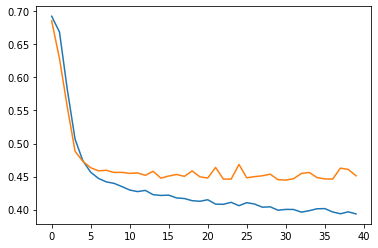

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
##### applying trained model on test data and getting outputs
f1 = open("/content/drive/My Drive/dlnlp-2/"+ds+".x.test.txt","rb")
sst_1_test_X = list()
print()
for line in f1:
  sst_1_test_X.append(line.decode('latin-1'))
f1.close()
corpus_test = np.array(sst_1_test_X)


pro_corpus_test = [] 
for sentence in corpus_test:
  pro_corpus_test.append(normalize_document(sentence))
print(len(pro_corpus_test))

sentence_emb_test = []
for sentence in pro_corpus_test:
  if len(sentence)<1:
    sentence_emb_test.append(default_emb)
    continue
  temp = []
  for word in sentence:
    if word in vocabulary:
      temp.append(model[word])
    else:
      temp.append(default_emb)
  sentence_emb_test.append(np.average(temp,axis=0))
sentence_emb_test = np.array(sentence_emb_test)
print(sentence_emb_test.shape)

test_pred = nnmodel.predict(sentence_emb_test)
print(test_pred.shape)
class_pred = []
for vec in test_pred:
  class_pred.append(int_to_label[np.argmax(vec)])

print(class_pred[:20])
np.savetxt("16705."+ds+".averagemodel.y.test.txt",class_pred,fmt="%s")


1000
(1000, 300)
(1000, 2)
['OBJ', 'OBJ', 'OBJ', 'SUBJ', 'OBJ', 'SUBJ', 'SUBJ', 'SUBJ', 'OBJ', 'SUBJ', 'SUBJ', 'SUBJ', 'SUBJ', 'OBJ', 'OBJ', 'OBJ', 'OBJ', 'OBJ', 'OBJ', 'OBJ']


['NEG', 'POS', 'VERY POS', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'VERY POS', 'VERY POS', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'VERY NEG']


In [ ]:
np.savetxt("17049.CR.averagemodel.y.test.txt",class_pred,fmt="%s")

In [ ]:
f1 = open("/content/drive/My Drive/upload/16570.TREC.charagram.y.test.txt")
labels_train = []
for line in f1:
  labels_train.append(line.split("\n")[0])
print(len(labels_train))
print(labels_train[:20])
f1.close()

500
['NUM', 'LOC', 'HUM', 'DESC', 'NUM', 'NUM', 'ENTY', 'LOC', 'DESC', 'DESC', 'LOC', 'HUM', 'NUM', 'HUM', 'NUM', 'NUM', 'ENTY', 'HUM', 'DESC', 'NUM']
